In [1]:
import pandas as pd
import os
import urllib
import csv
import cv2
import time
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [1]:
!pip install gdown

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-3.11.1-py3-none-any.whl size=9656 sha256=46b320fa87aa9c12d28655f7b94a0bcbf2c36b8fd06a128b5fae40eb1a704f7a
  Stored in directory: /home/vbajaj/.cache/pip/wheels/ac/0f/65/f8898ba51a103158b41f418d2a37cc928471624397da3af2f4
Successfully built gdown


In [2]:
!gdown --id 1mTtB8GTWs74Yeqm0KMExGJZh1eDbzUlT --output indian_number_plates.json

Downloading...
From: https://drive.google.com/uc?id=1mTtB8GTWs74Yeqm0KMExGJZh1eDbzUlT
To: /home/vbajaj/uplaraml/vipul/centrenet_keras/centernet_aux/data/indian_number_plates.json
100%|██████████████████████████████████████| 92.5k/92.5k [00:00<00:00, 57.5MB/s]


In [15]:
plates_df = pd.read_json('indian_number_plates.json', lines=True)

In [8]:
os.makedirs("../../datasets/number_plates", exist_ok=True)

In [16]:
dataset = dict()
dataset["image_name"] = list()
dataset["x_min"] = list()
dataset["y_min"] = list()
dataset["x_max"] = list()
dataset["y_max"] = list()
dataset["class_name"] = list()

counter = 0
for index, row in plates_df.iterrows():
    img = urllib.request.urlopen(row["content"])
    img = Image.open(img)
    img = img.convert('RGB')
    img.save(f'../../datasets/number_plates/licensed_car_{counter}.jpeg', "JPEG")
    
    dataset["image_name"].append(f'licensed_car_{counter}.jpeg')
    
    data = row["annotation"]
  
    width = data[0]["imageWidth"]
    height = data[0]["imageHeight"]

    dataset["x_min"].append(int(round(data[0]["points"][0]["x"] * width)))
    dataset["y_min"].append(int(round(data[0]["points"][0]["y"] * height)))
    dataset["x_max"].append(int(round(data[0]["points"][1]["x"] * width)))
    dataset["y_max"].append(int(round(data[0]["points"][1]["y"] * height)))
    dataset["class_name"].append("license_plate")
    
    counter += 1
print("Downloaded {} car images.".format(counter))

Downloaded 237 car images.


In [17]:
df = pd.DataFrame(dataset)
df.head()

,image_name,x_min,y_min,x_max,y_max,class_name
0,/licensed_car_0.jpeg,582,274,700,321,license_plate
1,/licensed_car_1.jpeg,80,382,288,449,license_plate
2,/licensed_car_2.jpeg,41,219,115,260,license_plate
3,/licensed_car_3.jpeg,217,313,359,359,license_plate
4,/licensed_car_4.jpeg,209,220,866,554,license_plate


In [18]:
def read_image_bgr(path):
    image = np.ascontiguousarray(Image.open(path).convert('RGB'))
    return image[:, :, ::-1]

In [19]:
def draw_box(image, box, color, thickness=2):
    """ Draws a box on an image with a given color.
    # Arguments
        image     : The image to draw on.
        box       : A list of 4 elements (x1, y1, x2, y2).
        color     : The color of the box.
        thickness : The thickness of the lines to draw a box with.
    """
    b = np.array(box).astype(int)
    cv2.rectangle(image, (b[0], b[1]), (b[2], b[3]), color, thickness, cv2.LINE_AA)


In [22]:
def show_image_objects(image_row):

  img_path = "../../datasets/number_plates/" + image_row.image_name
  box = [
    image_row.x_min, image_row.y_min, image_row.x_max, image_row.y_max
  ]

  image = read_image_bgr(img_path)

  draw = image.copy()
  draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

  draw_box(draw, box, color=(255, 255, 0))

  plt.axis('off')
  plt.imshow(draw)
  plt.show()

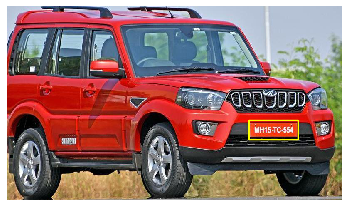

In [23]:
show_image_objects(df.iloc[0])

In [24]:
train_df, test_df = train_test_split(
  df, 
  test_size=0.2, 
)

In [25]:
ANNOTATIONS_FILE = '../../datasets/number_plates/annotations.csv'
CLASSES_FILE = '../../datasets/number_plates/classes.csv'

In [26]:
train_df.to_csv(ANNOTATIONS_FILE, index=False, header=None)

In [27]:
classes = set(['license_plate'])

with open(CLASSES_FILE, 'w') as f:
  for i, line in enumerate(sorted(classes)):
    f.write('{},{}\n'.format(line,i))

## Making test dataset

In [ ]:

TEST_ANNOTATIONS_FILE = '../../datasets/number_plates/test_annotations.csv'
TEST_CLASSES_FILE = '../../datasets/number_plates/test_classes.csv'
test_df.to_csv(TEST_ANNOTATIONS_FILE, index=False, header=None)
classes = set(['license_plate'])

with open(TEST_CLASSES_FILE, 'w') as f:
  for i, line in enumerate(sorted(classes)):
    f.write('{},{}\n'.format(line,i))

## A csv dataset is ready

#### Debugging mode

In [48]:
df=pd.read_csv('../../datasets/number_plates/annotations.csv')

In [49]:
df.head()

,licensed_car_63.jpeg,35,195,192,272,license_plate
0,licensed_car_213.jpeg,124,110,400,207,license_plate
1,licensed_car_165.jpeg,115,173,318,240,license_plate
2,licensed_car_175.jpeg,133,218,488,424,license_plate
3,licensed_car_45.jpeg,407,169,534,214,license_plate
4,licensed_car_60.jpeg,769,726,1122,845,license_plate


In [9]:
df.iloc(1)

In [35]:
df['/licensed_car_63.jpeg']=df['/licensed_car_63.jpeg'].apply(lambda x: x.split('/')[1])

In [41]:
df.columns

Index(['/licensed_car_63.jpeg', '35', '195', '192', '272', 'license_plate'], dtype='object')

In [46]:
df=df.rename(columns = {'/licensed_car_63.jpeg':'licensed_car_63.jpeg'})

In [47]:
df.to_csv(ANNOTATIONS_FILE, index=False)